In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Yelp数据集分析

- user
- POI
- user-POI interaction （check-ins, reviews）

In [2]:
dict = {'id':['user','POI','check-in','categories'],'value':[1326100,174566,5261668,59104]}
df = pd.DataFrame(dict,columns = ['id','value'])
print('原始数据')
df

原始数据


,id,value
0,user,1326100
1,POI,174566
2,check-in,5261668
3,categories,59104


In [5]:
#文件路径
file_yelp_business = 'D:\data\yelp_csv\yelp_business.csv'
file_yelp_user = 'D:\data\yelp_csv\yelp_user.csv'
file_yelp_review = 'D:\data\yelp_csv\yelp_review.csv'
file_yelp_tip = 'D:\data\yelp_csv\yelp_tip.csv'

In [4]:
#笔记本路径
file_yelp_business = 'E:\data\yelp_csv\yelp_business.csv'
file_yelp_user = 'E:\data\yelp_csv\yelp_user.csv'
file_yelp_review = 'E:\data\yelp_csv\yelp_review.csv'
file_yelp_tip = 'E:\data\yelp_csv\yelp_tip.csv'

# 1. business数据处理

In [44]:
#business数据处理
data_business = pd.read_csv(file_yelp_business,encoding = 'latin-1' )

D:\Python\Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
data_business.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

In [46]:
len(data_business.index) #POI的个数
print("POI的个数是：%d" % len(data_business.index))

POI的个数是：174566


In [47]:
col_index = ['business_id','city', 'state','latitude', 'longitude', 'stars', 'review_count','categories']

In [48]:
business = data_business[col_index]
business.head()

,business_id,city,state,latitude,longitude,stars,review_count,categories
0,FYWN1wneV18bWNgQjJ2GNg,Ahwatukee,AZ,33.330690,-111.978599,4.0,22,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,McMurray,PA,40.291685,-80.104900,3.0,11,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,Phoenix,AZ,33.524903,-112.115310,1.5,18,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,Tempe,AZ,33.383147,-111.964725,3.0,9,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,OH,41.119535,-81.475690,3.5,116,American (New);Nightlife;Bars;Sandwiches;Ameri...


## 1.1 POI种类分析

In [19]:
print(business.iloc[0]['categories']) #种类样式

Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists


In [25]:
categories = business['categories'].dropna()
print(len(categories)) #去除没有种类的POI
categories.head()

174562


business_id
FYWN1wneV18bWNgQjJ2GNg    Dentists;General Dentistry;Health & Medical;Or...
He-G7vWjzVUysIKrfNbPUQ    Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
KQPW8lFf1y5BT2MxiSZ3QA    Departments of Motor Vehicles;Public Services ...
8DShNS-LuFqpEWIp0HxijA                              Sporting Goods;Shopping
PfOCPjBrlQAnz__NXj9h_w    American (New);Nightlife;Bars;Sandwiches;Ameri...
Name: categories, dtype: object

In [34]:
business_cats=' '.join(categories)
cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
c=cats.category.value_counts()#计算每一个种类的数目
c=c.sort_values(ascending=False)
print('Total number of categories:--- %d ---' % len(c)) #种类的数目

Total number of categories:--- 59104 ---


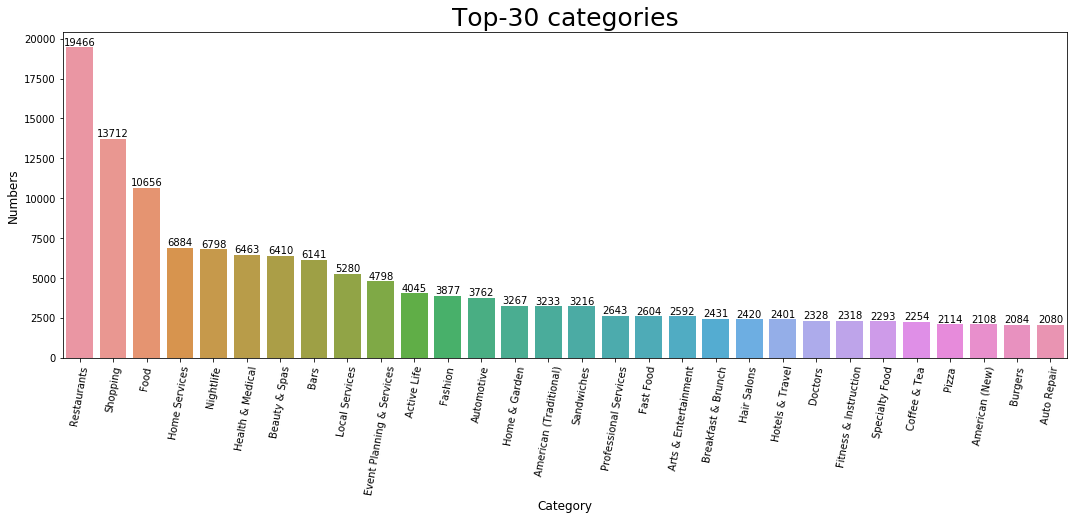

In [35]:
#Top-N种类绘制
x = c.iloc[0:30]
plt.figure(figsize=(18,6))
ax = sns.barplot(x.index, x.values)
plt.title("Top-30 categories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Numbers', fontsize=12)
plt.xlabel('Category', fontsize=12)

'''在柱体上绘制数值标签
需要获取的参数：x，y，t 分别是横坐标、宽度、高度
参数获取方式：在用bar()函数绘制柱形图时返回的是一个矩形对象，矩形对象中每一个就是图中的柱体，每个都包含了自己的横坐标、柱体宽度和高度

eg.  rects = plt.bar()
     for rect in rects:
         x = rect.get_x() #获取柱体的横坐标
         width = rect.get_width() #获取柱体的宽度
         height = rect.get_height() #获取柱体的高度
         
'''
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels): 
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, label, ha='center', va='bottom')

plt.show()

# US各州缩写  

![u=1052843616,2796047409&fm=26&gp=0.jpg](https://i.loli.net/2019/04/02/5ca35eaa2804f.jpg)  

![201403051522159049.jpg](https://i.loli.net/2019/04/02/5ca35eaa33876.jpg)

## 1.2 城市分析

### State POI统计

In [36]:
state = business['state']

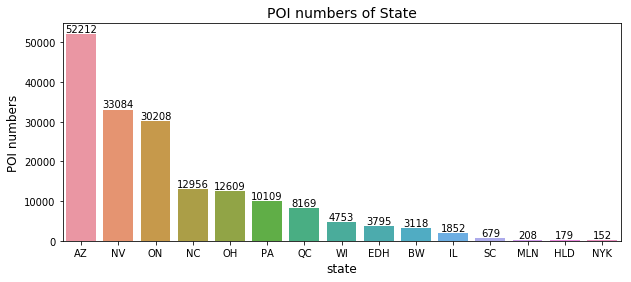

In [37]:
state_count = state.value_counts().iloc[0:15]   #统计各州中POI的数目

plt.figure(figsize = (10,4))

ax = sns.barplot(state_count.index, state_count.values)

for rect, value in zip(ax.patches, state_count.values):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,value, ha = 'center', va = 'bottom')

ax.set_title('POI numbers of State',fontsize = 14)
ax.set_xlabel('state',fontsize = 12)
ax.set_ylabel('POI numbers',fontsize = 12)

plt.show()


In [14]:
state_uniq = state.unique()  #统计州的数目
state_uniq

array(['AZ', 'PA', 'OH', 'BW', 'NV', 'ON', 'NC', 'WI', 'SC', 'QC', 'IL',
       'MLN', 'EDH', 'FIF', 'CHE', 'CO', 'NYK', 'NE', 'HLD', 'WLN', 'ABE',
       'WA', 'SCB', 'KHL', 'ESX', 'CMA', 'FAL', 'ELN', 'NY', 'PKN', 'ST',
       '1', 'CA', 'NLK', 'GLG', 'C', 'VS', 'IN', 'XGL', 'AL', 'STG', 'VT',
       'CS', '30', 'AR', 'SL', 'NI', 'BY', 'AK', '89146', 'FLN', nan, 'FL',
       'MN', '6', 'NTH', 'MT', 'B', 'GA', 'VA', '85250', 'DE', 'AB', 'HU',
       'KY', '3', 'TAM', 'ZET', 'RCC', 'WHT', '43.0506402'], dtype=object)

### City POI统计

In [38]:
city = business['city']

城市总数：1096


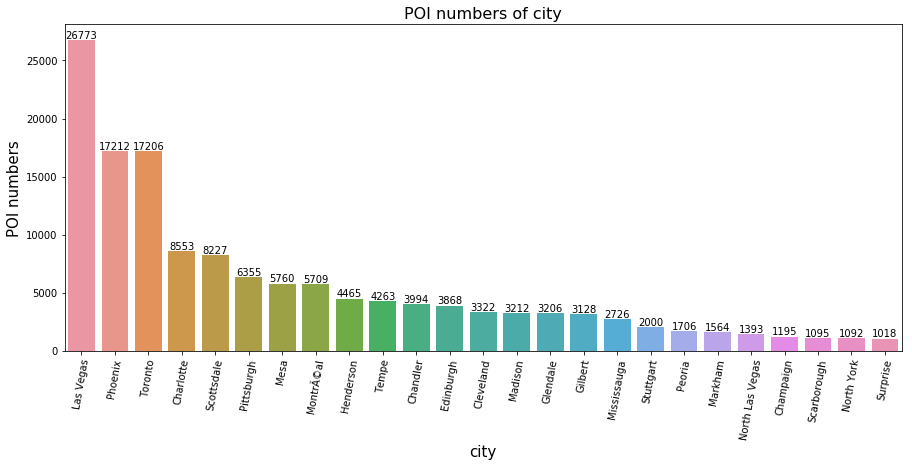

In [16]:
city_count = city.value_counts() #统计各城市中POI的数目
print("城市总数：%d" % len(city_count))


city_counts = city_count[city_count > 1000]   #统计各州中POI的数目

plt.figure(figsize = (15,6))

ax = sns.barplot(city_counts.index, city_counts.values)

locs, labels = plt.xticks()
plt.setp(labels, rotation=80)

for rect, value in zip(ax.patches, city_counts.values):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5,value, ha = 'center', va = 'bottom')

ax.set_title('POI numbers of city',fontsize = 16)
ax.set_xlabel('city',fontsize = 15)
ax.set_ylabel('POI numbers',fontsize = 15)

plt.show()


In [17]:
city_uniq = city.unique()  #统计城市的数目
city_uniq

array(['Ahwatukee', 'McMurray', 'Phoenix', ..., 'Henderson (Green Valley)',
       'Side Slopes', 'Saint-Basile-Le-Grand'], dtype=object)

### POI按照州和城市索引整理

In [49]:
#将POI按照州和城市索引划分
state_index = business['state']
city_index = business['city']
#POI_byCity 
POI_byCity  = business[['business_id','state','latitude', 'longitude', 'stars', 'review_count','categories']]
POI_byCity.index = city_index
POI_byCity = POI_byCity.sort_index()

In [50]:
POI_byCity.head()

,business_id,state,latitude,longitude,stars,review_count,categories
city,,,,,,,
110 Las Vegas,M82c96ICluambjx0wWg6Bg,NV,36.099575,-115.306722,5.0,63,Smog Check Stations;Automotive;Oil Change Stat...
53719,2Cmpz9lgr-wfOLAwgUf79g,43.0506402,4.000000,35.000000,1.0,Asian Fusion;Restaurants;Chinese,NaN
AGINCOURT,LixFCMGKdptI8WRsjAl5cQ,ON,43.794282,-79.329940,2.5,6,Fast Food;Burgers;Restaurants
AZ,t_cdPjiBmsQgEO_1JWFdSg,85250,-111.925408,5.000000,6.0,1,NaN
Aberdour,2DBNUgEeFaQ3FznUA7P1eQ,FIF,56.055265,-3.297981,4.0,4,Landmarks & Historical Buildings;Public Servic...


In [52]:
las =POI_byCity.loc['Las Vegas']

In [58]:
las[las['state'] == 'NV'].head()

,business_id,state,latitude,longitude,stars,review_count,categories
city,,,,,,,
Las Vegas,xQ2d9VZeRi57GrGt46oV4g,NV,36.160013,-115.145399,5.0,5,Printing Services;Local Services;Financial Ser...
Las Vegas,FQpEfakfaMfByZ6Qe7fn4w,NV,36.216391,-115.244585,3.5,14,Hair Salons;Beauty & Spas
Las Vegas,U62f1Ty-NYh7jtH3Yb8tmQ,NV,36.161432,-115.174366,2.0,32,Department Stores;Fashion;Grocery;Food;Shoppin...
Las Vegas,FMOWO7_mj8lSZnV3WqpGiA,NV,36.161608,-115.286887,3.5,122,Department Stores;Food;Fashion;Shopping
Las Vegas,FStFa2esHFgsAjVzIGJcQA,NV,36.278140,-115.206377,3.0,85,Mattresses;Home Services;Home Decor;Furniture ...


# 2. user数据处理

In [61]:
#user数据处理
data_user = pd.read_csv(file_yelp_user,encoding = 'latin-1')

In [64]:
data_user.columns 

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [70]:
usecols = ['user_id','name','review_count','yelping_since','friends', 'average_stars']
data_user = data_user[usecols].sort_values(by='review_count',ascending = False)
data_user.head()

,user_id,name,review_count,yelping_since,friends,average_stars
1308091,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA...",3.28
1091628,RtGqdDBvvBCjcu5dUqwfzA,Shila,11323,2010-10-17,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw...",3.82
1126294,P5bUL3Engv-2z6kKohB6qQ,Kim,9788,2006-05-31,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ...",3.80
355751,hWDybu_KvYLSdEFzGrniTw,Bruce,8353,2009-03-08,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w...",3.58
990211,8RcEwGrFIgkt9WQ35E6SnQ,George,7764,2009-11-06,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ...",3.49


### 社交关系整理

In [75]:
user_friendship = data_user[['user_id','friends']]
user_friendship.head()

,user_id,friends
1308091,8k3aO-mPeyhbR5HUucA5aA,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA..."
1091628,RtGqdDBvvBCjcu5dUqwfzA,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw..."
1126294,P5bUL3Engv-2z6kKohB6qQ,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ..."
355751,hWDybu_KvYLSdEFzGrniTw,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w..."
990211,8RcEwGrFIgkt9WQ35E6SnQ,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ..."


# 3. review/Check-in数据处理

In [62]:
data_review = pd.read_csv(file_yelp_review,encoding = 'latin-1')

In [76]:
data_review.columns#usecols = ['review_id', 'user_id', 'business_id', 'stars', 'date']

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [77]:
data_review.index

RangeIndex(start=0, stop=5261668, step=1)

In [78]:
check_ins = data_review[['user_id','business_id','date','stars','text']]
check_ins[0:50].sort_values(by = ['user_id','date']).head()

,user_id,business_id,date,stars,text
5,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,2014-09-24,5,Cycle Pub Las Vegas was a blast! Got a groupon...
0,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,5,Super simple place but amazing nonetheless. It...
1,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,5,Small unassuming place that changes their menu...
2,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,5,Lester's is located in a beautiful neighborhoo...
3,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,4,Love coming here. Yes the place always needs t...


#### 整合business数据

In [79]:
result = pd.merge(check_ins,data_business[['business_id','city', 'state','latitude', 'longitude', 'categories']], on = 'business_id', how = 'left')

In [81]:
result

,user_id,business_id,date,stars,text,city,state,latitude,longitude,categories
50,u0LXt3Uea_GidxRW1xcsfg,DKiRDPtQ5cTN-eX1oEgA9w,2017-01-04,3,It's a pub... nice and clean one.\n\nCame here...,Toronto,ON,43.670684,-79.384556,Nightlife;Bars;Pubs
51,u0LXt3Uea_GidxRW1xcsfg,I44P6Pfoey2pArOhhx2RnA,2017-10-17,4,Cute little hole in the wall place. Two entran...,Toronto,ON,43.671356,-79.379243,Restaurants;Japanese
52,u0LXt3Uea_GidxRW1xcsfg,zkU-WMio8g6dpRJ2Y2xqvQ,2017-01-04,4,Came here for dim sum - it's one of those mark...,Markham,ON,43.824029,-79.326184,Restaurants;Chinese;Dim Sum
53,u0LXt3Uea_GidxRW1xcsfg,P-nqq5kOv2wV2mB5To5elQ,2010-09-15,2,"Opened by Pickle Barrel, Glow is meant to be t...",Toronto,ON,43.734050,-79.345582,Restaurants;Canadian (New);American (New)
54,u0LXt3Uea_GidxRW1xcsfg,FQr_scgz9a4sXTdRS4d3mg,2015-06-15,3,Nice place by Cumberland place. After we had s...,Toronto,ON,43.670658,-79.390278,Lebanese;Middle Eastern;Restaurants
55,u0LXt3Uea_GidxRW1xcsfg,3RlylOY452bA8rwliPUeUQ,2017-01-04,4,My sister loves this place! Probably comes by ...,Toronto,ON,43.668936,-79.386217,Korean;Restaurants
56,u0LXt3Uea_GidxRW1xcsfg,SCklYa_jhihWAcfIn-_chg,2010-03-31,4,Long line ups for Sunday brunch - but so worth...,Toronto,ON,43.659795,-79.346287,Restaurants;French;Breakfast & Brunch
57,u0LXt3Uea_GidxRW1xcsfg,lRwpFFaFr3QQ5fGHkk3eXQ,2010-03-31,4,Stumbled upon this one day - thought I would g...,Toronto,ON,43.647922,-79.401064,Sushi Bars;Japanese;Restaurants
58,u0LXt3Uea_GidxRW1xcsfg,AF_VU15nNsqIg7-y9uiQug,2011-01-06,2,Went with my friend as we had purchased the Gr...,Toronto,ON,43.649055,-79.370359,Skin Care;Hair Salons;Eyelash Service;Nail Sal...
59,u0LXt3Uea_GidxRW1xcsfg,IBZ6e3P0OqcPXVjvGlpueQ,2012-09-23,4,"Fish is good, really good. Love how you could ...",Toronto,ON,43.675913,-79.358405,Gluten-Free;Seafood;Comfort Food;Fish & Chips;...


# 4. tip数据处理

In [34]:
data_tip = pd.read_csv(file_yelp_tip, encoding = 'latin-1')

In [35]:
data_tip.columns

Index(['text', 'date', 'likes', 'business_id', 'user_id'], dtype='object')

In [36]:
data_tip.index

RangeIndex(start=0, stop=1098324, step=1)

In [37]:
tip = data_tip[[ 'user_id','business_id','date','text']]
tip

,user_id,business_id,date,text
0,ZcLKXikTHYOnYt5VYRO5sg,jH19V2I9fIslnNhDzPmdkA,2015-08-12,Great breakfast large portions and friendly wa...
1,oaYhjqBbh18ZhU0bpyzSuw,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,Nice place. Great staff. A fixture in the tow...
2,ulQ8Nyj7jCUR8M83SUMoRQ,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,Happy hour 5-7 Monday - Friday
3,ulQ8Nyj7jCUR8M83SUMoRQ,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,"Parking is a premium, keep circling, you will ..."
4,ulQ8Nyj7jCUR8M83SUMoRQ,k7WRPbDd7rztjHcGGkEjlw,2017-02-25,Homemade pasta is the best in the area
...,...,...,...,...
1098319,A9WQWLL7mN6cwOklTcbppg,AR0b2PPSBfl8SRUGx-QCmA,2017-12-03,Awesome food great live entertainment
1098320,FcWOFsW8dvG5BHTB_ZPyhg,Cs8YvyehNELsgOsf5Us4Dg,2017-12-04,Amazing! Great food and prices. Upgrade to the...
1098321,bQxvo4r6y6HImAJZShR3Eg,RWwcoU716D8j519RL7paVA,2017-12-05,Great new place. Staff was very friendly and h...
1098322,kA6L6nrjJnu1bfkLGN8l9Q,ZqTXN4qh0Ta1Lp8Z3v-dKg,2017-12-08,"We waited 1.5 hour for the food, asked multipl..."


In [38]:
tip['text'][6]

"Come early on Sunday's to avoid the rush"